In [ ]:
!python -m pip install -qq kaggle


In [ ]:
%%bash
mkdir ~/.kaggle
cp kaggle.json ~/.kaggle/
chmod 600 /root/.kaggle/kaggle.json
kaggle datasets download sarangdilipjodh/indian-traffic-signs-prediction85-classes
unzip -qq "/content/indian-traffic-signs-prediction85-classes.zip"              #load dataset
rm -rf "/content/sample_data"

100%|██████████| 1.13G/1.13G [00:09<00:00, 127MB/s]


In [ ]:
import os                        # Module for interacting with the operating system
import string                    # Module with utility functions for working with strings
import numpy as np               # Numerical computing library
import pandas as pd              # Library for data manipulation and analysis
import seaborn as sns            # Data visualization library built on top of matplotlib
import tensorflow as tf         # Deep learning framework
from matplotlib import pyplot as plt  # Plotting library
from PIL import Image            # Library for working with images
import re                        # Module for working with regular expressions


In [ ]:

# Traning classes
training_classes=os.listdir('/content/traffic_sign_classification_dataset/train')
print('Total classes:',len(training_classes))
print('Class names:',training_classes)
#clean class names
training_classes_clean=[re.sub('[^A-Za-z0-9 ]',' ',class_)for class_ in training_classes]
training_classes_clean=[re.sub('[ ]+','_',class_).casefold() for class_ in training_classes_clean]
print('Cleaned class names:',training_classes_clean)
#rename classes name with clean class names
for old_name,new_name in zip(training_classes,training_classes_clean):
  os.rename(os.path.join('/content/traffic_sign_classification_dataset/train',old_name),
            os.path.join('/content/traffic_sign_classification_dataset/train',new_name))

Total classes: 85
Class names: ['LOAD_LIMIT', 'HEIGHT_LIMIT', 'PASS_EITHER_SIDE', 'GUARDED_LEVEL_CROSSING', 'OVERTAKING_PROHIBITED', 'SPEED_LIMIT_80', 'ROUNDABOUT', 'TRAFFIC_SIGNAL', 'NO_STOPPING_OR_STANDING', 'HORN_PROHIBITED', 'RIGHT_REVERSE_BEND', 'TRUCK_PROHIBITED', 'UNGUARDED_LEVEL_CROSSING', 'NO_PARKING', 'SIDE_ROAD_LEFT', 'MEN_AT_WORK', 'WIDTH_LIMIT', 'COMPULSARY_TURN_LEFT', 'QUAY_SIDE_OR_RIVER_BANK', 'CROSS_ROAD', 'TURN_RIGHT', 'RIGHT_HAIR_PIN_BEND', 'SPEED_LIMIT_70', 'TONGA_PROHIBITED', 'U_TURN_PROHIBITED', 'COMPULSARY_CYCLE_TRACK', 'BARRIER_AHEAD', 'FERRY', 'SIDE_ROAD_RIGHT', 'STOP', 'HUMP_OR_ROUGH_ROAD', 'COMPULSARY_KEEP_RIGHT', 'CYCLE_PROHIBITED', 'CATTLE', 'SPEED_LIMIT_15', 'LOOSE_GRAVEL', 'PEDESTRIAN_CROSSING', 'NARROW_BRIDGE', 'ALL_MOTOR_VEHICLE_PROHIBITED', 'SPEED_LIMIT_60', 'SPEED_LIMIT_5', 'STAGGERED_INTERSECTION', 'PEDESTRIAN_PROHIBITED', 'LEFT_REVERSE_BEND', 'COMPULSARY_SOUND_HORN', 'SPEED_LIMIT_30', 'PRIORITY_FOR_ONCOMING_VEHICLES', 'FALLING_ROCKS', 'COMPULSARY_TUR

In [ ]:
# Testing classes
testing_classes=os.listdir('/content/traffic_sign_classification_dataset/test')
print('Total classes:',len(testing_classes))
print('Class names:',testing_classes)
#clean class names
testing_classes_clean=[re.sub('[^A-Za-z0-9 ]',' ',class_)for class_ in testing_classes]
testing_classes_clean=[re.sub('[ ]+','_',class_).casefold() for class_ in testing_classes_clean]
print('Cleaned class names:',testing_classes_clean)
#rename classes name with clean class names
for old_name,new_name in zip(testing_classes,testing_classes_clean):
  os.rename(os.path.join('/content/traffic_sign_classification_dataset/test',old_name),
            os.path.join('/content/traffic_sign_classification_dataset/test',new_name))

Total classes: 85
Class names: ['LOAD_LIMIT', 'HEIGHT_LIMIT', 'PASS_EITHER_SIDE', 'GUARDED_LEVEL_CROSSING', 'OVERTAKING_PROHIBITED', 'SPEED_LIMIT_80', 'ROUNDABOUT', 'TRAFFIC_SIGNAL', 'NO_STOPPING_OR_STANDING', 'HORN_PROHIBITED', 'RIGHT_REVERSE_BEND', 'TRUCK_PROHIBITED', 'UNGUARDED_LEVEL_CROSSING', 'NO_PARKING', 'SIDE_ROAD_LEFT', 'MEN_AT_WORK', 'WIDTH_LIMIT', 'COMPULSARY_TURN_LEFT', 'QUAY_SIDE_OR_RIVER_BANK', 'CROSS_ROAD', 'TURN_RIGHT', 'RIGHT_HAIR_PIN_BEND', 'SPEED_LIMIT_70', 'TONGA_PROHIBITED', 'U_TURN_PROHIBITED', 'COMPULSARY_CYCLE_TRACK', 'BARRIER_AHEAD', 'FERRY', 'SIDE_ROAD_RIGHT', 'STOP', 'HUMP_OR_ROUGH_ROAD', 'COMPULSARY_KEEP_RIGHT', 'CYCLE_PROHIBITED', 'CATTLE', 'SPEED_LIMIT_15', 'LOOSE_GRAVEL', 'PEDESTRIAN_CROSSING', 'NARROW_BRIDGE', 'ALL_MOTOR_VEHICLE_PROHIBITED', 'SPEED_LIMIT_60', 'SPEED_LIMIT_5', 'STAGGERED_INTERSECTION', 'PEDESTRIAN_PROHIBITED', 'LEFT_REVERSE_BEND', 'COMPULSARY_SOUND_HORN', 'SPEED_LIMIT_30', 'PRIORITY_FOR_ONCOMING_VEHICLES', 'FALLING_ROCKS', 'COMPULSARY_TUR

In [ ]:

from tensorflow.python.ops.gen_batch_ops import batch
#load dataset - train,test and valid
train=tf.keras.utils.image_dataset_from_directory('/content/traffic_sign_classification_dataset/train',
                                                  labels='inferred',label_mode='int',class_names=None,
                                                  color_mode='rgb',batch_size=256,image_size=(256,256),
                                                  shuffle=True,validation_split=0.3,
                                                  interpolation='bilinear',
                                                  subset='training',seed=8,)


valid=tf.keras.utils.image_dataset_from_directory('/content/traffic_sign_classification_dataset/train',
                                                  labels='inferred',label_mode='int',class_names=None,
                                                  color_mode='rgb',batch_size=256,image_size=(256,256),
                                                  shuffle=True,validation_split=0.3,
                                                  interpolation='bilinear',
                                                  subset='validation',seed=8,)

test=tf.keras.utils.image_dataset_from_directory('/content/traffic_sign_classification_dataset/test',
                                                  labels='inferred',label_mode='int',class_names=None,
                                                  color_mode='rgb',batch_size=256,image_size=(256,256),
                                                  shuffle=False,validation_split=0.0,
                                                  interpolation='bilinear',
                                                  subset=None,seed=8,)
print('Total training images:',train.cardinality()*32)
print('Total validation images:',valid.cardinality()*32)
print('Total test images:',test.cardinality()*32)
training_classes:list=train.class_names
valid_classes:list=train.class_names
test_classes:list=train.class_names
assert training_classes==valid_classes==test_classes,'class count in train, valid and test set is not same'
print('Class names:',training_classes)

Found 4438 files belonging to 85 classes.
Using 3107 files for training.
Found 4438 files belonging to 85 classes.
Using 1331 files for validation.
Found 1288 files belonging to 85 classes.
Total training images: tf.Tensor(416, shape=(), dtype=int64)
Total validation images: tf.Tensor(192, shape=(), dtype=int64)
Total test images: tf.Tensor(192, shape=(), dtype=int64)
Class names: ['all_motor_vehicle_prohibited', 'axle_load_limit', 'barrier_ahead', 'bullock_and_handcart_prohibited', 'bullock_prohibited', 'cattle', 'compulsary_ahead', 'compulsary_ahead_or_turn_left', 'compulsary_ahead_or_turn_right', 'compulsary_cycle_track', 'compulsary_keep_left', 'compulsary_keep_right', 'compulsary_minimum_speed', 'compulsary_sound_horn', 'compulsary_turn_left', 'compulsary_turn_left_ahead', 'compulsary_turn_right', 'compulsary_turn_right_ahead', 'cross_road', 'cycle_crossing', 'cycle_prohibited', 'dangerous_dip', 'direction', 'falling_rocks', 'ferry', 'gap_in_median', 'give_way', 'guarded_level_cro

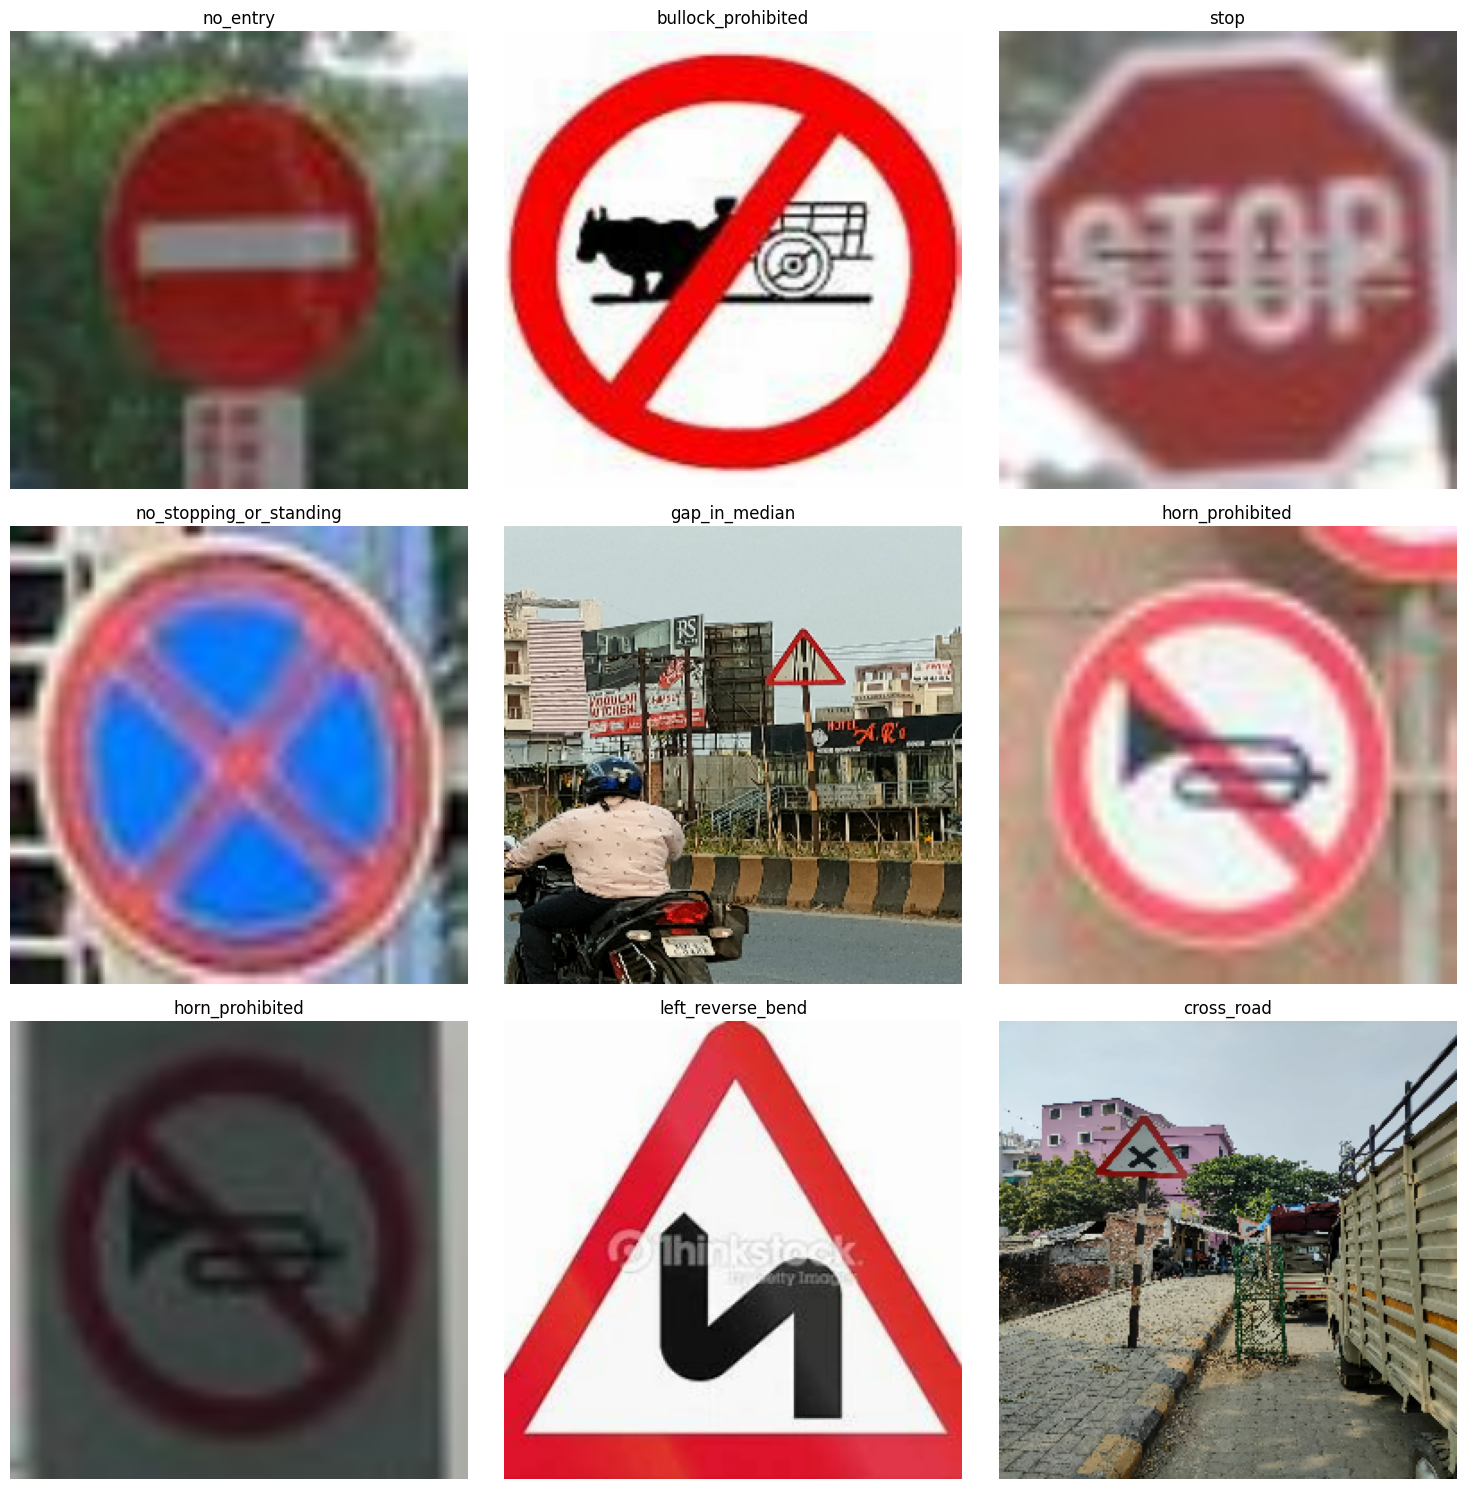

In [ ]:
#make plot data
for images,labels in train.take(1):break
images_to_plot:int=9
plt.figure(figsize=(15,15))
for index in range(9):
  plt.subplot(3,3,index+1)
  plt.imshow(images[index].numpy().astype('uint8'))
  plt.axis('off')
  plt.title(training_classes[labels[index].numpy()])
plt.tight_layout()
plt.show()

In [ ]:
print('Maximum pixel values:',tf.reduce_max(images))
print('Minimum pixel values:',tf.reduce_min(images))
print('Object type of input(X):',type(images))
print('Data type of input(X):',images.dtype)
print('Object type of input(y):',type(images))
print('Data type of input(y):',labels.dtype)

Maximum pixel values: tf.Tensor(255.0, shape=(), dtype=float32)
Minimum pixel values: tf.Tensor(0.0, shape=(), dtype=float32)
Object type of input(X): <class 'tensorflow.python.framework.ops.EagerTensor'>
Data type of input(X): <dtype: 'float32'>
Object type of input(y): <class 'tensorflow.python.framework.ops.EagerTensor'>
Data type of input(y): <dtype: 'int32'>


In [ ]:
# make apply data augmentation to data (add more randomness to data)
# source: https://www.tensorflow.org/tutorials/images/data_augmentation
random_flip=tf.keras.layers.RandomFlip('horizontal_and_vertical',name='random_flip')# random flip layer
random_zoom=tf.keras.layers.RandomZoom(height_factor=0.1,width_factor=0.1,name='random_zoom')# random zoom layer
random_rotate=tf.keras.layers.RandomRotation(0.3,name='random_rotate')          # random rotate layers
random_brightness=tf.keras.layers.RandomBrightness(0.3,value_range=(0.0,255.0),name='random_brightness')# random brightness layer
augmentations=[random_flip,random_zoom,random_rotate,random_brightness]         # make list of data augmentation
# make apply augmentation on training data
for augmentation in augmentations:
  train.map(lambda images,labels: (augmentation(images),labels))                # make apply augmentation

In [ ]:
# configure the dataset for performance
# source: https://www.tensorflow.org/tutorials/images/classification#configure_the_dataset_for_performance

#train=train.cache().shuffle(1024).prefetch(buffer_size=tf.data.AUTOTUNE)
#valid=valid.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
#test=test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
#make a model
model=tf.keras.Sequential(layers=None,name='traffic_sign_classifier')
model.add(tf.keras.layers.Rescaling(1./255.,offset=0,name='rescaling_01',input_shape=(256,256,3)))
# first forward pass :: inputs : (256,256,3) -> outputs : (64,64,32)
model.add(tf.keras.layers.Conv2D(32,(7,7),strides=(2,2),padding='same',name='conv_32x7s2_02'))
model.add(tf.keras.layers.BatchNormalization(name='btz_norm_03'))
model.add(tf.keras.layers.ReLU(name='relu_04'))
model.add(tf.keras.layers.Conv2D(32,(3,3),strides=(2,2),padding='same',name='conv_32x3s2_05'))
model.add(tf.keras.layers.BatchNormalization(name='btz_norm_06'))
model.add(tf.keras.layers.ReLU(name='relu_07'))
# second forward pass :: inputs : (64,64,32) -> outputs : (32,32,64)
model.add(tf.keras.layers.Conv2D(64,(3,3),strides=(1,1),padding='same',name='conv_64x3s1_08'))
model.add(tf.keras.layers.BatchNormalization(name='btz_norm_09'))
model.add(tf.keras.layers.ReLU(name='relu_10'))
model.add(tf.keras.layers.Conv2D(64,(3,3),strides=(2,2),padding='same',name='conv_64x3s2_11'))
model.add(tf.keras.layers.BatchNormalization(name='btz_norm_12'))
model.add(tf.keras.layers.ReLU(name='relu_13'))
# third forward pass :: inputs : (32,32,64) -> outputs : (16,16,128)
model.add(tf.keras.layers.Conv2D(128,(3,3),strides=(1,1),padding='same',name='conv_128x3s1_12'))
model.add(tf.keras.layers.BatchNormalization(name='btz_norm_13'))
model.add(tf.keras.layers.ReLU(name='relu_14'))
model.add(tf.keras.layers.Conv2D(128,(3,3),strides=(2,2),padding='same',name='conv_128x3s2_15'))
model.add(tf.keras.layers.BatchNormalization(name='btz_norm_16'))
model.add(tf.keras.layers.ReLU(name='relu_17'))
# fourth forward pass :: inputs : (16,16,128) -> outputs : (8,8,256)
model.add(tf.keras.layers.Conv2D(256,(3,3),strides=(1,1),padding='same',name='conv_256x3s1_18'))
model.add(tf.keras.layers.BatchNormalization(name='btz_norm_19'))
model.add(tf.keras.layers.ReLU(name='relu_20'))
model.add(tf.keras.layers.Conv2D(256,(3,3),strides=(2,2),padding='same',name='conv_256x3s2_21'))
model.add(tf.keras.layers.BatchNormalization(name='btz_norm_22'))
model.add(tf.keras.layers.ReLU(name='relu_23'))
# add dense map to network
model.add(tf.keras.layers.Flatten(name='flatten_24'))
model.add(tf.keras.layers.Dense(1024,activation='relu',name='fully_connected_25'))
model.add(tf.keras.layers.Dropout(0.3,name='dropout_0__3_26'))
model.add(tf.keras.layers.Dense(1024,activation='relu',name='dense_1024_27'))
model.add(tf.keras.layers.Dropout(0.3,name='dropout_0__3_28'))
model.add(tf.keras.layers.Dense(len(training_classes),activation='softmax',
                                name=f'dense_{len(training_classes)}_output_29'))

# make print model summary
model.summary(line_length=120,expand_nested=True,show_trainable=True)

Model: "traffic_sign_classifier"
___________________________________________________________________________________________________________________________________
 Layer (type)                                         Output Shape                                    Param #           Trainable  
 rescaling_01 (Rescaling)                             (None, 256, 256, 3)                             0                 Y          
                                                                                                                                   
 conv_32x7s2_02 (Conv2D)                              (None, 128, 128, 32)                            4736              Y          
                                                                                                                                   
 btz_norm_03 (BatchNormalization)                     (None, 128, 128, 32)                            128               Y          
                                           

In [ ]:
# make compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [ ]:
# make early stopping
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy',min_delta=0,patience=10,verbose=1,mode='auto',restore_best_weights=True)

# make train model
history=model.fit(train,batch_size=None,epochs=10_000,verbose=2,callbacks=[early_stop],
                  validation_split=0,validation_data=valid,shuffle=True)

Epoch 1/10000
13/13 - 75s - loss: 6.3772 - sparse_categorical_accuracy: 0.0399 - val_loss: 4.3836 - val_sparse_categorical_accuracy: 0.0240 - 75s/epoch - 6s/step
Epoch 2/10000
13/13 - 48s - loss: 3.8500 - sparse_categorical_accuracy: 0.0660 - val_loss: 4.4870 - val_sparse_categorical_accuracy: 0.0451 - 48s/epoch - 4s/step
Epoch 3/10000
13/13 - 51s - loss: 3.5034 - sparse_categorical_accuracy: 0.1336 - val_loss: 3.9541 - val_sparse_categorical_accuracy: 0.0391 - 51s/epoch - 4s/step
Epoch 4/10000
13/13 - 52s - loss: 3.1551 - sparse_categorical_accuracy: 0.1854 - val_loss: 3.9284 - val_sparse_categorical_accuracy: 0.0428 - 52s/epoch - 4s/step
Epoch 5/10000
13/13 - 58s - loss: 2.8999 - sparse_categorical_accuracy: 0.2292 - val_loss: 4.1630 - val_sparse_categorical_accuracy: 0.0458 - 58s/epoch - 4s/step
Epoch 6/10000
13/13 - 50s - loss: 2.6524 - sparse_categorical_accuracy: 0.2758 - val_loss: 4.4239 - val_sparse_categorical_accuracy: 0.0488 - 50s/epoch - 4s/step
Epoch 7/10000
13/13 - 50s - 

In [ ]:
# see model history (first five epoches)
pd.DataFrame(history.history).head()

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,6.377214,0.039910,4.383643,0.024042
1,3.849961,0.065980,4.486986,0.045079
2,3.503403,0.133569,3.954068,0.039068
3,3.155120,0.185388,3.928391,0.042825
4,2.899929,0.229160,4.163033,0.045830


In [ ]:
# see model history (last five epoches)
pd.DataFrame(history.history).tail()

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
51,0.196386,0.943032,1.303351,0.770849
52,0.156690,0.949147,1.087070,0.794891
53,0.131927,0.960090,2.209527,0.659654
54,0.110708,0.964274,1.178838,0.804658
55,0.104559,0.966205,1.427193,0.746807


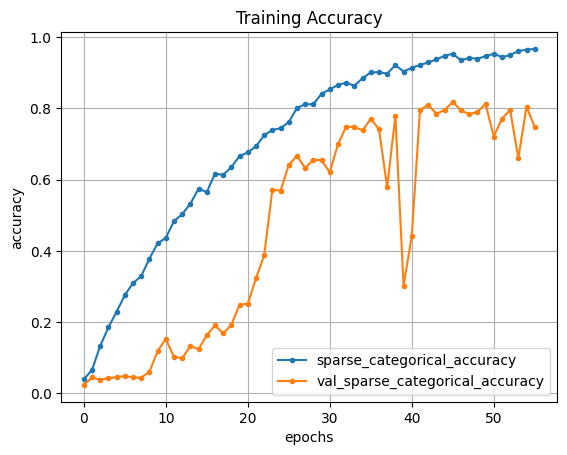

In [ ]:
# make plot training accuracy and validation accuracy
pd.DataFrame(history.history)[['sparse_categorical_accuracy','val_sparse_categorical_accuracy']].plot(marker='.')# make plot
plt.grid(),plt.title('Training Accuracy'),plt.xlabel('epochs'),plt.ylabel('accuracy')# add grid, title and axis labels
plt.show()                                                                      # make plot show

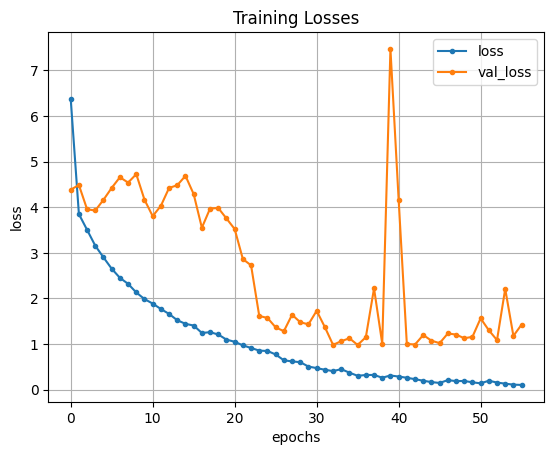

In [ ]:
# make plot training losses and validation losses
pd.DataFrame(history.history)[['loss','val_loss']].plot(marker='.')             # make plot
plt.grid(),plt.title('Training Losses'),plt.xlabel('epochs'),plt.ylabel('loss') # add grid, title and axis labels
plt.show()                                                                      # make plot show

In [ ]:
# evaluate model
results=model.evaluate(test,batch_size=None,verbose="auto",sample_weight=None,return_dict=True)
print('Testing results:',results)                                               # make print results

6/6 [==============================] - 5s 387ms/step - loss: 1.0094 - sparse_categorical_accuracy: 0.8129
Testing results: {'loss': 1.0094438791275024, 'sparse_categorical_accuracy': 0.8128882050514221}


In [ ]:
# make save model (weights and configuration)
model.save('traffic_sign_classifier',overwrite=True,save_format=None)           # make save

In [ ]:
!zip -r -qq "traffic_sign_classifier.zip" "traffic_sign_classifier"             # make zip model
# make auto download model weights
from google.colab import files                                                  # load file class
files.download('traffic_sign_classifier.zip')                                   # download model zip file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>